In [114]:
#encoding: utf8
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Loading data
Loading data, arbitrarily selecting the first frame for closer inspection, and after manual exploration excemplifying with row 242 of that frame.
Further, also concentrating on the unknown line ("line = myst"), and just looking at that subset of the spectrum.

The line simply looks pretty noisy, possibly a blend but it is not clear.

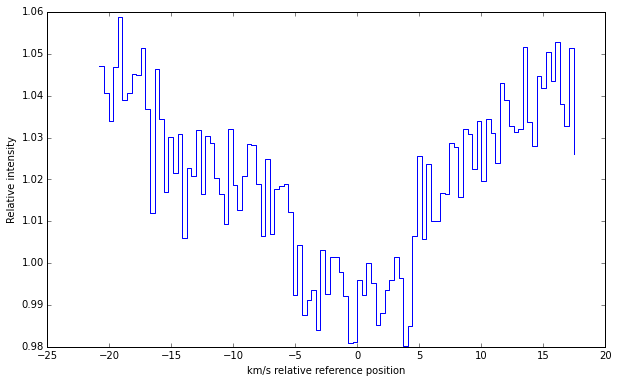

In [142]:
import matplotlib.pyplot as pl
import interactive as intr
import visualize as vis
import danframe as dan
import kontin as con
import lines as lin
import numpy as np
pl.rcParams["figure.figsize"] = (10,6) # Bigger figures

s6405_t5p = dan.frameseries("data/6405_aS1","top 5%")
s6405_seg = dan.frameseries("data/6405_aS1","segments")

lins = lin.make_lines_from_wins(s6405_t5p,s6405_t5p.pkwindows)

FeI  = lins[1]
SiFe = lins[2]
myst = lins[3]

line = myst

frm  = s6405_t5p.frames[0]
data = frm.data[242,:]
lmbd = s6405_t5p.lmbd
pl.step(linevel(lmbd[line.idx]) ,data[line.idx]);
pl.ylabel("Relative intensity")
pl.xlabel("km/s relative reference position")
pl.show()

#### Smoothing
Lets try smoothing, here I use both boxcar smoothing and Savitzky-Golay smoothing, trying some slightly different combinations of smoothing paramameters. 

It becomes quite clear that mild smoothing will not really help finding the line centre since the line bottom is obviously composed of four blended lines. The wings are also a blend of several lines, all in all I've counted something like ten lines constituting the unknown "line".

This is of course only one of the rows from one of the frames, but just casually looking around individual rows contain similar examples, as well as cases where the bottom forming lines have blended beyond the resolution limit in different configurations.

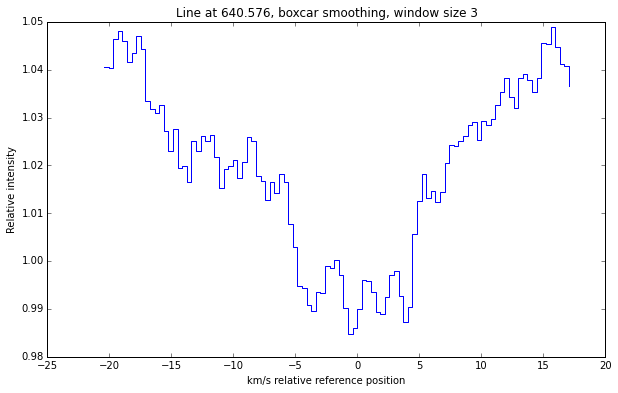

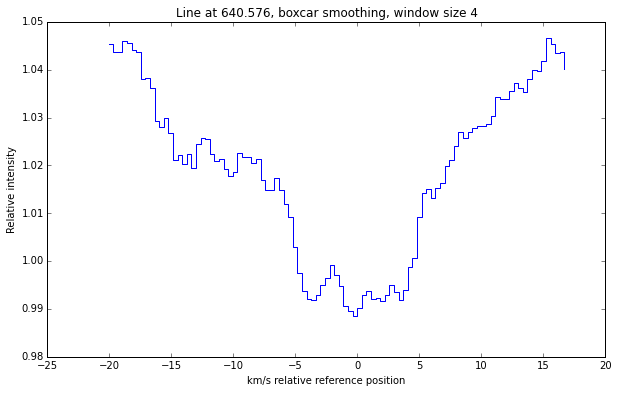

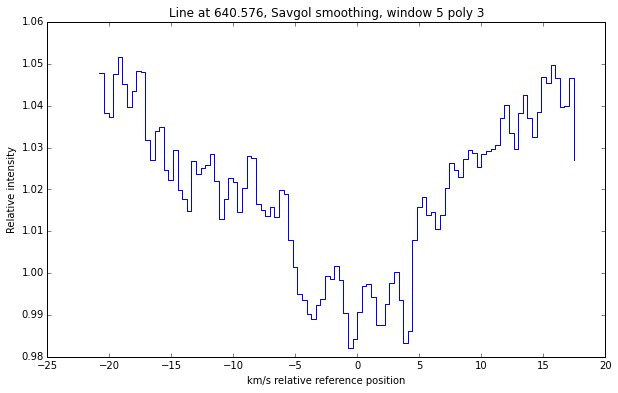

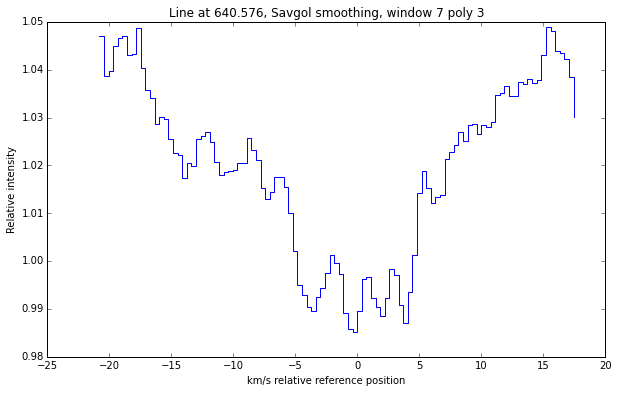

In [143]:
import scipy.signal as sg

#Boxcar convolution, aka sliding average

#Window size of three
box3  = np.convolve(data[line.idx],np.ones(3)/3.,"valid")
lbox3 = np.convolve(lmbd[line.idx],np.ones(3)/3.,"valid")

pl.step(linevel(lbox3),box3);
pl.title("Line at {}, boxcar smoothing, window size 3".format(myst.name))
pl.ylabel("Relative intensity")
pl.xlabel("km/s relative reference position")
pl.show()

#Window size of four
box4  = np.convolve(data[line.idx],np.ones(5)/5.,"valid")
lbox4 = np.convolve(lmbd[line.idx],np.ones(5)/5.,"valid")

pl.step(linevel(lbox4),box4);
pl.title("Line at {}, boxcar smoothing, window size 4".format(myst.name))
pl.ylabel("Relative intensity")
pl.xlabel("km/s relative reference position")
pl.show()


sav53  = sg.savgol_filter(data[line.idx],5,3)
lsav53 = sg.savgol_filter(lmbd[line.idx],5,3)

pl.step(linevel(lsav53),sav53);
pl.title("Line at {}, Savgol smoothing, window 5 poly 3".format(myst.name))
pl.ylabel("Relative intensity")
pl.xlabel("km/s relative reference position")
pl.show()

sav73  = sg.savgol_filter(data[line.idx],7,3)
lsav73 = sg.savgol_filter(lmbd[line.idx],7,3)

pl.step(linevel(lsav73) ,sav73);
pl.title("Line at {}, Savgol smoothing, window 7 poly 3".format(myst.name))
pl.ylabel("Relative intensity")
pl.xlabel("km/s relative reference position")
pl.show()

In [141]:
def linevel(lam):
    c = 299792.458 # km/s
    return c*(lam - line.cent)/line.cent